In [5]:
import numpy as np
import matplotlib.pylab as plt
import healpy as hp

In [91]:
## Extra functions

def get_randoms_sphere(size):
    """Generate random points on a sphere.

    Parameters
    ----------
    size : int
        size of random sample.
    
    Returns
    -------
    phi : array_like/float
        Longitude coordinate.
    theta : array_like/float
        Latitude coordinate.
    """
    if size == 1:
        phi = 2.*np.pi*np.random.random_sample(1)[0]
        u = np.random.random_sample(1)[0]
        theta = np.arccos(1.-2.*u)
    else:
        phi = 2.*np.pi*np.random.random_sample(size)
        u = np.random.random_sample(size)
        theta = np.arccos(1.-2.*u)
    return phi, theta


def real2heal(phi_real, theta_real):
    """Converts healpix phi and theta coodinates into real spherical coordinates.

    Parameters
    ----------
    phi_real : array_like
        longitude (l or ra)
    theta_real : array_like
        latitude (b or dec)
    
    Returns
    -------
    phi_heal : array_like 
        healpix longitude.
    theta_heal : array_like
        healpix latitude.
    """
    phi_heal, theta_heal = np.copy(phi_real), np.copy(theta_real)
    theta_heal = 0.5 * np.pi - theta_heal
    return phi_heal, theta_heal


In [92]:
pwd

u'/Users/krishna/Research/PhD/CMB/cmb_hawking_rings/add_rings'

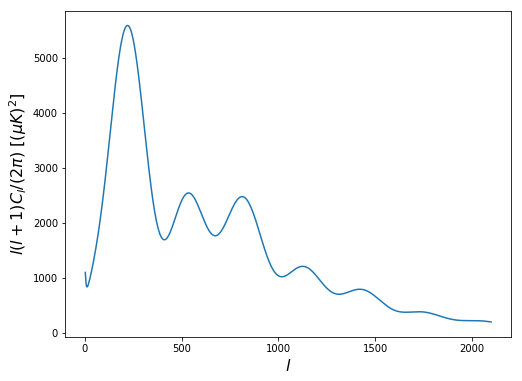

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [93]:
# Calculated from command line running of CAMB-0.1.7 the default base_planck_lowl_lowLike.ini file
data = np.loadtxt('/Users/krishna/Research/PhD/CMB/cmb_hawking_rings/gaussian_maps/cls/test_lensedCls.dat', unpack=True)
l = data[0]
cl = data[1]

# Sanity check...
plt.figure(figsize=(8, 6))
plt.plot(l, cl)
plt.xlabel(r'$l$', fontsize=16)
plt.ylabel(r'$l(l+1)C_{l}/(2\pi)$ $[(\mu K)^{2}]$', fontsize=16)
plt.show()

# cls are multiplied by l(l+1)/(2pi) so need to get rid of this constant [units are muK^2]
cl *= 2.*np.pi/(l*(l+1.))

# need to add cls for l = 0, 1 (i.e. l=0 => constant background and l=1 => dipole)
l = np.concatenate([np.array([0., 1.]), l])
cl = np.concatenate([np.zeros(2), cl])

# see https://healpy.readthedocs.io/en/latest/generated/healpy.sphtfunc.synfast.html#healpy.sphtfunc.synfast
# for additional parameters (such as adding a Gaussian smoothing, etc)

nside, lmax = 2048, 1500
map_sim = hp.synfast(cl, nside, lmax=lmax)

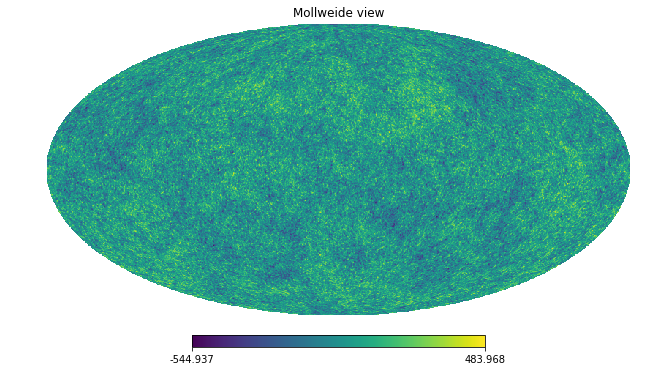

In [94]:
hp.mollview(map_sim)
plt.show()

In [95]:
def get_ring(phi, theta, r1, r2):
    vec = hp.ang2vec(theta, phi)
    t1, t2 = np.deg2rad(10.), np.deg2rad(10.5)
    inner_disc = hp.query_disc(nside, vec, r1, nest=False)
    outer_disc = hp.query_disc(nside, vec, r2, nest=False)
    ring = list(set(outer_disc) - set(inner_disc))
    return ring

In [96]:
phi, theta = ir2.get_randoms_sphere(300)

In [97]:
for i in range(0, len(phi)):
    ring = get_ring(phi[i], theta[i], 0.01, 0.04)
    map_sim[ring] = 50.

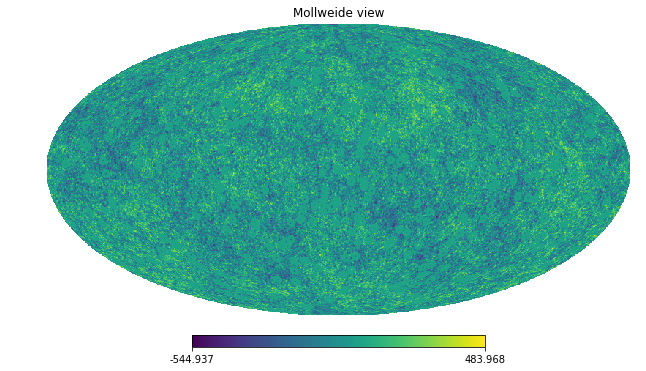

In [98]:
hp.mollview(map_sim)
plt.show()

In [99]:
cl_sim = hp.anafast(map_sim, lmax=lmax)
cl_sim *= (l[:len(cl_sim)]*(l[:len(cl_sim)]+1.))/(2.*np.pi)
cl *= (l*(l+1.))/(2.*np.pi)

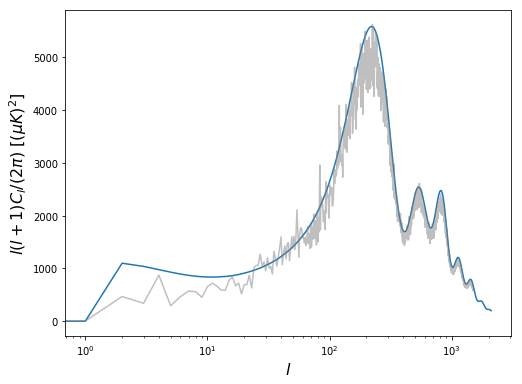

In [100]:
# plot input cls vs cls from simulated map
plt.figure(figsize=(8, 6))
plt.plot(l, cl)
plt.plot(l[:len(cl_sim)], cl_sim, color='grey', alpha=0.5)
plt.xlabel(r'$l$', fontsize=16)
plt.ylabel(r'$l(l+1)C_{l}/(2\pi)$ $[(\mu K)^{2}]$', fontsize=16)
plt.xscale('log')
plt.show()